In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

In [2]:
train= pd.read_csv('C:/Users/Techa/Desktop/DataSet/Hackaton/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_train.csv')
test=pd.read_csv('C:/Users/Techa/Desktop/DataSet/Hackaton/free-ai-classes-in-every-city-hackathon-2023/Housing_dataset_test.csv')

In [3]:
train.shape, test.shape

((14000, 7), (6000, 6))

In [4]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


## ----------------New--------------------------------

In [5]:
train.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [6]:
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


<Axes: xlabel='bedroom', ylabel='Count'>

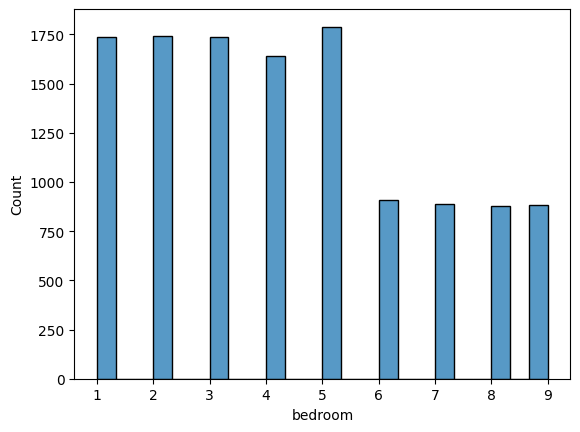

In [37]:
sns.histplot(data=train, x="bedroom")

* Most houses in the dataset has about 1 to 5 bedrooms.
* House with more than 6 bedrooms are less common

<Axes: xlabel='bathroom', ylabel='Count'>

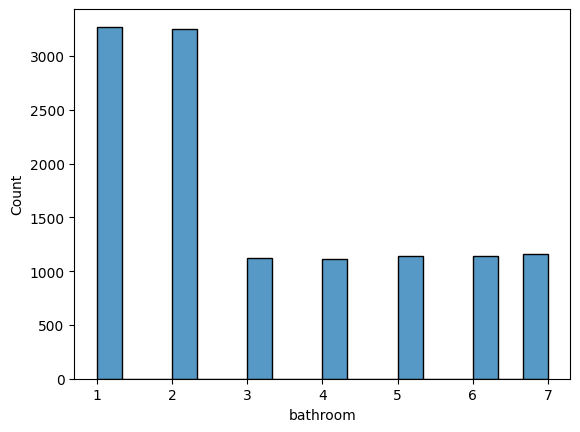

In [9]:
sns.histplot(data=train, x="bathroom")

* The average number of bathroom in Nigeria houses is three.

In [34]:
fig = px.histogram(train, y="title", text_auto=True, color_discrete_sequence=px.colors.sequential.RdBu,title="Count of House Type")
fig.show()

* Cottage are small house intended for small family size, and it no doubt of their lack of popularity in Nigeria houses, as Nigerians general have large family size.
* Most common house type in Nigeria include Flat, Apartment, Townhouse, Mansion and Duplex.

In [27]:
fig = px.histogram(train, x='bedroom', y='price',  text_auto=True, color_discrete_sequence=px.colors.sequential.RdBu,
            title="House Price in Relation to the number of bedrooms")
fig.show()

* The bar chart above shows the general house trend in Nigeria.
* The prices of a house increase with the number of bedroom. However, the chart also shows above certain number of rooms, the house price might not neccessrily increase.

In [28]:
fig = px.histogram(train, x='bathroom', y='price',  text_auto=True,color_discrete_sequence=px.colors.sequential.RdBu,
            title="House Price in Relation to the number of bathrooms")
fig.show()

In [29]:
fig = px.histogram(train, x="price", color_discrete_sequence=px.colors.sequential.RdBu,title="Distribuction of House Prices in Nigeria")
fig.show()

In [39]:
fig = px.box(train, y="price", title=' distribution of House Prices through its quartiles')
fig.show()

* The box plot of the price feature of the house price dataset shows the presence of outliers.
* There are certain houses with prices above the third quarter house price range.
* This can significantly affect the predictive power of our model.

In [26]:
fig = px.pie(train, values='price', names='title', title='Prices of House Type')
fig.show()

### ======================END===============================

In [10]:
#Check for the percetage of missing values
train.isnull().sum() * 100 / len(train)

ID                0.000000
loc              12.950000
title            12.300000
bedroom          12.850000
bathroom         12.892857
parking_space    12.935714
price             0.000000
dtype: float64

In [11]:
def cleandf(train):
    train = train.dropna(subset=['loc'])
    train.reset_index(drop=True, inplace=True)
    # fill the missing value in title with the most occuring value
    train['title'] = train['title'].fillna(train['title'].mode()[0])
    train['bedroom'] = train['bedroom'].fillna(train['bedroom'].mode()[0])
    train['parking_space'] = train['parking_space'].fillna(train['parking_space'].mode()[0])
    train['bathroom'] = train['bathroom'].fillna(train['bathroom'].mean())
    
    return train

In [12]:
train = cleandf(train)

C:\Users\Techa\AppData\Local\Temp\ipykernel_5080\2703087038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['title'] = train['title'].fillna(train['title'].mode()[0])
C:\Users\Techa\AppData\Local\Temp\ipykernel_5080\2703087038.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['bedroom'] = train['bedroom'].fillna(train['bedroom'].mode()[0])
C:\Users\Techa\AppData\Local\Temp\ipykernel_5080\2703087038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [13]:
def tranfm(train):
    oe= OrdinalEncoder()
    ohe= OneHotEncoder()
    train['loc'] = oe.fit_transform(train[['loc']])

    one_hot_encoded = ohe.fit_transform(train[['title']])

    # Convert the sparse matrix to a pandas DataFrame
    encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=ohe.get_feature_names_out(['title']))

    # Concatenate the encoded DataFrame with the original DataFrame
    train = pd.concat([train, encoded_df], axis=1)
    return train

In [14]:
train = tranfm(train)

In [15]:
train.drop(['ID'], axis=1, inplace=True)
train.drop(['title'], axis=1, inplace=True)
y=train.pop('price')
X=train.values

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=123)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((8530, 14), (3657, 14), (8530,), (3657,))

In [17]:
rf = RandomForestRegressor()
lr = LinearRegression()

In [18]:
# def model_b(model, xtrain, ytrain, xtest, ytest):
#     model.fit(xtrain, ytrain)
#     acc = model.score(xtest, ytest)
#     pred = model.predict(xtest)
#     return acc, pred 


# lracc, lrpred = model_b(lr, xtrain, ytrain, xtest, ytest)
# print("Logistic regression is ", lracc)

# rfacc, rfpred = model_b(rf, xtrain, ytrain, xtest, ytest)
# print("RandomForest regression is ", rfacc)

In [30]:
rf.fit(xtrain, ytrain)
rfacc = rf.score(xtest, ytest)
rfpred = rf.predict(xtest)
print("RandomForest regression is ", rfacc)

RandomForest regression is  0.7032961331910705


In [50]:
mean_squared_error(ytest, rfpred)

315976187671.28534

### Using the Random forest Model for predicting new dataset

In [38]:
test.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [39]:
df=test.copy()

In [40]:
df.drop('ID', axis=1, inplace=True)

In [41]:
df= tranfm(df)

In [42]:
df.drop('title', axis=1, inplace=True)

In [43]:
testt= df.values

In [44]:
testpred = rf.predict(testt)
testpred[:10]

array([1968198.03315033, 1039252.438066  , 1255064.34462733,
       7345551.37678999, 2282300.41159333, 2753004.36261   ,
       2580766.43286   , 1806680.56474033, 1383904.959161  ,
       1427406.290546  ])

In [45]:
len(testpred)

6000

In [46]:
test['PricePredicted'] = testpred
test.head()

,ID,loc,title,bedroom,bathroom,parking_space,PricePredicted
0,845,Kano,Penthouse,4,1,2,1.968198e+06
1,1924,Adamawa,Apartment,2,2,4,1.039252e+06
2,10718,Adamawa,Bungalow,2,7,2,1.255064e+06
3,12076,Lagos,Mansion,9,5,2,7.345551e+06
4,12254,Gombe,Semi-detached duplex,5,6,1,2.282300e+06


In [51]:
prediction = pd.DataFrame(test[['ID','PricePredicted']]).to_csv('victor_Jokanola_Submissiondsn.csv',index=False)